 # **Task 1:**
# **MOVIE GENRE CLASSIFICATION**

# Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

* Step 1: Importing Necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
columns = [ 'Movie Name' , 'Genre' , 'Description']
column = ['Movie Name' , 'Description']

* Step 2: Importing Dataset

In [3]:
df_train = pd.read_csv('train_data.txt' , delimiter=':::' , engine='python' , names=columns , index_col=0 )
df_train.head()

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
df_test_data= pd.read_csv('test_data.txt', delimiter=':::' , engine='python' , names=column , index_col=0 )
df_test_data.head()

,Movie Name,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [5]:
df_test= pd.read_csv('test_data_solution.txt', delimiter=':::' , engine='python' , names=columns , index_col=0 )
df_test.head()

,Movie Name,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [6]:
df_train.describe()

,Movie Name,Genre,Description
count,6311,6311,6311
unique,6311,27,6309
top,Oscar et la dame rose (2009),drama,"Olga, Masha, and Irina Prozoroff lead lonely ..."
freq,1,1557,2


In [7]:
df_test.describe()

,Movie Name,Genre,Description
count,3202,3202,3202
unique,3202,27,3199
top,Edgar's Lunch (1998),drama,"Viola and Sebastian are lookalike twins, sepa..."
freq,1,842,2


In [8]:
df_test_data.describe()

,Movie Name,Description
count,4909,4909
unique,4909,4906
top,Edgar's Lunch (1998),"Viola and Sebastian are lookalike twins, sepa..."
freq,1,2


* Step 3: Data Preprocessing

In [9]:
# Converting the Description column in lowercase
df_train.loc[:,'Description'] = df_train['Description'].astype(str).str.lower()
df_test.loc[:,'Description'] = df_test['Description'].astype(str).str.lower()
#df_train.loc[:,'Description']
#df_test.loc[:,'Description']

In [10]:
df_train.drop(columns=['Movie Name'], inplace = True)
df_test.drop(columns=['Movie Name'], inplace = True)

* Displaying the Training & Testing Dataset After Preprocessing:

In [11]:
print("Training Dataset:")
df_train.head()

Training Dataset:


,Genre,Description
1,drama,listening in to a conversation between his do...
2,thriller,a brother and sister with a past incestuous r...
3,adult,as the bus empties the students for their fie...
4,drama,to help their unemployed father make ends mee...
5,drama,the film's title refers not only to the un-re...


In [12]:
print("Testing Dataset:")
df_test.head()

Testing Dataset:


,Genre,Description
1,thriller,"l.r. brane loves his life - his car, his apar..."
2,comedy,"spain, march 1964: quico is a very naughty ch..."
3,documentary,one year in the life of albin and his family ...
4,drama,"his father has died, he hasn't spoken with hi..."
5,drama,before he was known internationally as a mart...


* Information of Datasets:

In [13]:
print("Training Dataset:\n")
print(df_train.info())
print("\n Testing Dataset:\n")
print(df_test.info())

Training Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 6311 entries, 1 to 6311
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        6311 non-null   object
 1   Description  6311 non-null   object
dtypes: object(2)
memory usage: 147.9+ KB
None

 Testing Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 3202 entries, 1 to 3202
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        3202 non-null   object
 1   Description  3202 non-null   object
dtypes: object(2)
memory usage: 75.0+ KB
None


* Shape of the Datasets:

In [14]:
print("Training Dataset:")
print(df_train.shape)
print("\nTesting Dataset:")
print(df_test.shape)

Training Dataset:
(6311, 2)

Testing Dataset:
(3202, 2)


* Class Distribution of train data

In [15]:
class_distribution = df_train['Genre'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Genre
 drama           1557
 documentary     1530
 comedy           869
 short            587
 horror           248
 thriller         227
 action           149
 western          125
 reality-tv       105
 family            88
 adventure         87
 sci-fi            82
 music             77
 adult             77
 romance           63
 animation         57
 sport             52
 crime             51
 talk-show         44
 fantasy           40
 mystery           40
 biography         38
 musical           33
 history           27
 game-show         26
 news              18
 war               14
Name: count, dtype: int64


* Step: 4 Data Cleaning

* Checking Null Values:

In [16]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Genre          0
Description    0
dtype: int64
Genre          0
Description    0
dtype: int64


* Displaying the duplicate values:

In [17]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

2
2


* Deleting the Duplicate Values:

In [18]:
df_train = df_train.drop_duplicates(keep ='first')
df_test = df_test.drop_duplicates(keep = 'first')

print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())
print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


In [19]:
print(df_train.shape)
print(df_test.shape)

(6309, 2)
(3200, 2)


In [20]:
# SEPARATE FEATURES AND LABELS FOR TRAINING AND TEST DATASETS
x_train_full = df_train['Description']
y_train_full = df_train['Genre']

x_test = df_test['Description']
y_test = df_test['Genre']

In [21]:
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)

(6309,)
(6309,)
(3200,)
(3200,)


* Step : 5 Visualization

* Plot of the Distribution of genres in the training dataset:

<ipython-input-22-cc4bb60d0061>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='viridis')


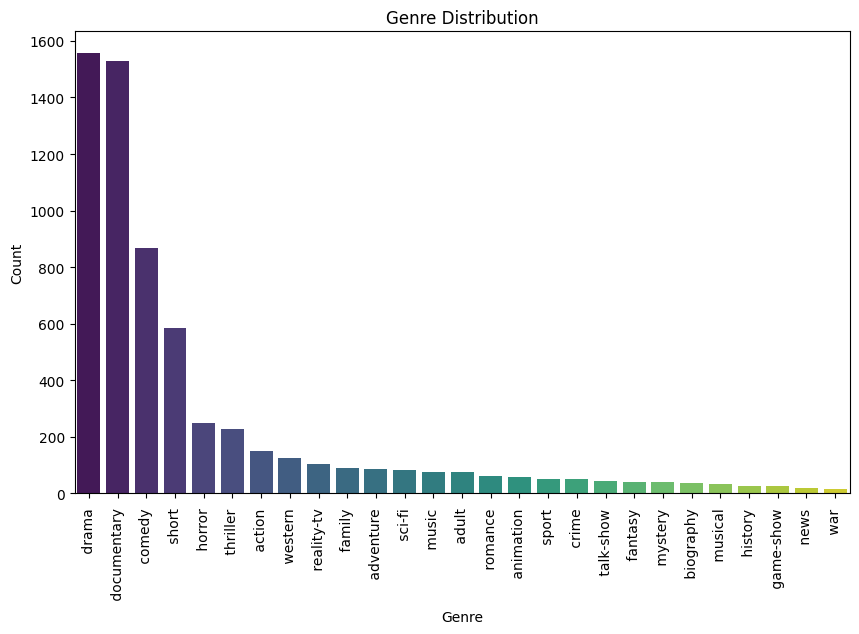

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

* Step: 6 Data Splitting

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)

In [24]:
print("Shapes of the splitting datasets:")
print(X_train.shape)
print(X_val.shape)
print(x_test.shape)

print('\n')

print(Y_train.shape)
print(Y_val.shape)
print(y_test.shape)

Shapes of the splitting datasets:
(5047,)
(1262,)
(3200,)


(5047,)
(1262,)
(3200,)


* Step: 7 Feature Extraction

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)
#X_val_vec.shape

* Step:8 Model Training and Evaluation

* Fitting a NaiveBayes model

In [26]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec , Y_train)

MultinomialNB()

In [27]:
y_pred_nb = nb_classifier.predict(X_val_vec)
print("Naive Bayes Accuracy:", accuracy_score(Y_val , y_pred_nb))
print("Classification Report:")
print(classification_report(Y_val , y_pred_nb))

Naive Bayes Accuracy: 0.4532488114104596
Classification Report:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        32
       adult        0.00      0.00      0.00        20
   adventure        0.00      0.00      0.00        16
   animation        0.00      0.00      0.00        11
   biography        0.00      0.00      0.00         4
      comedy        0.68      0.16      0.26       187
       crime        0.00      0.00      0.00        11
 documentary        0.56      0.89      0.68       314
       drama        0.37      0.85      0.51       310
      family        0.00      0.00      0.00        19
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         3
     history        0.00      0.00      0.00         3
      horror        0.00      0.00      0.00        41
       music        0.00      0.00      0.00        13
     musical        0.00      0.00      0.00         8


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Fitting a Logistic Regression

In [28]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_vec , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred_lr = lr_classifier.predict(X_val_vec)
print("Logistic Regression Accuracy:", accuracy_score(Y_val , y_pred_lr))
print("Classification Report:")
print(classification_report(Y_val , y_pred_lr))

Logistic Regression Accuracy: 0.5055467511885895
Classification Report:
               precision    recall  f1-score   support

      action        1.00      0.03      0.06        32
       adult        0.00      0.00      0.00        20
   adventure        0.00      0.00      0.00        16
   animation        0.00      0.00      0.00        11
   biography        0.00      0.00      0.00         4
      comedy        0.51      0.42      0.46       187
       crime        0.00      0.00      0.00        11
 documentary        0.58      0.89      0.71       314
       drama        0.44      0.82      0.57       310
      family        0.00      0.00      0.00        19
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         3
     history        0.00      0.00      0.00         3
      horror        0.82      0.22      0.35        41
       music        0.00      0.00      0.00        13
     musical        0.00      0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Fitting Support Vector Classification

In [30]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vec , Y_train)

SVC(kernel='linear')

In [31]:
y_pred_svm = svm_classifier.predict(X_val_vec)
print("Support Vector Machines Accuracy:", accuracy_score(Y_val , y_pred_svm))
print(classification_report(Y_val , y_pred_svm))

Support Vector Machines Accuracy: 0.5126782884310618
               precision    recall  f1-score   support

      action        0.40      0.06      0.11        32
       adult        0.00      0.00      0.00        20
   adventure        0.40      0.12      0.19        16
   animation        0.00      0.00      0.00        11
   biography        0.00      0.00      0.00         4
      comedy        0.46      0.42      0.44       187
       crime        0.00      0.00      0.00        11
 documentary        0.62      0.85      0.72       314
       drama        0.44      0.78      0.56       310
      family        0.00      0.00      0.00        19
     fantasy        0.00      0.00      0.00         3
   game-show        1.00      0.33      0.50         3
     history        0.00      0.00      0.00         3
      horror        0.78      0.51      0.62        41
       music        1.00      0.31      0.47        13
     musical        0.00      0.00      0.00         8
     myster

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Model Improvement

In [32]:
# Tuning the hyperparameters of the best model:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}
nb = MultinomialNB()
nb_clf = GridSearchCV(nb, parameters, cv=5)
nb_clf.fit(X_train_vec, Y_train)

y_pred_nb_tuned = nb_clf.predict(X_val_vec)
acc_nb_tuned = accuracy_score(Y_val , y_pred_nb_tuned)
print("Accuracy of Naive Bayes Model after Tuning:", acc_nb_tuned)
print(classification_report(Y_val , y_pred_nb_tuned))


Accuracy of Naive Bayes Model after Tuning: 0.5126782884310618
               precision    recall  f1-score   support

      action        0.50      0.09      0.16        32
       adult        1.00      0.10      0.18        20
   adventure        1.00      0.12      0.22        16
   animation        0.00      0.00      0.00        11
   biography        0.00      0.00      0.00         4
      comedy        0.58      0.43      0.49       187
       crime        0.00      0.00      0.00        11
 documentary        0.58      0.88      0.70       314
       drama        0.42      0.80      0.55       310
      family        0.00      0.00      0.00        19
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         3
     history        0.00      0.00      0.00         3
      horror        0.79      0.37      0.50        41
       music        1.00      0.08      0.14        13
     musical        0.00      0.00      0.00         8
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Step:9 Predictions

In [33]:
new_data = ['A wizard attempting to capture Death to bargain for eternal life traps her younger brother Dream instead. Fearful for his safety, the wizard kept him imprisoned in a glass bottle for decades. After his escape, Dream, also known as Morpheus, goes on a quest for his lost objects of power.']
new_data_vec = tfidf.transform(new_data)
model = nb_clf
predictions = model.predict(new_data_vec)
print(predictions)

[' fantasy ']


In [34]:
new_data = ['A sisters breast cancer diagnosis and her brothers need to take action. Highlighting the events that took place during Franke participation in the Susan G. Komen 3-Day Walk, including the training and fund-raising events in the six months preceding the Walk. It includes numerous interviews with breast cancer survivors who share the wealth of their experience with the viewer. Also included are appearances by local celebrities, athletes and musical artists, as well as informative interviews with health care professionals who explain what we should all know about dealing with this illness. This is the film the doctor should have given my sister before she left his office that fateful day. So I made this film for my sister, and for all our sisters... that they would always remember,You are not alone.']
new_data_vec = tfidf.transform(new_data)
predictions = model.predict(new_data_vec)
print(predictions)

[' documentary ']


In [35]:
new_data = ['The symbolic caress. The argument is the erotic power of a choreography with three people: camera, colour, and above all, bust. The musical illustration is a electroacoustic piece named Adonai, of André Almuro, composer and working for radios. The score, totally independant, no repeating, no illustrative, add an erotic charge to the sensorial perception of the movie. Editing functions with formal analogies contained by shots, without any consequence. It is a gathering of moduls reconstituted in a whole thing by the linearity of the movie. In this one, the bodys desire is always present, expressed by the language of images. Concerning the topic, it is this body, space to film, sacralised by visual interventions and exploration of camera. The projection on big screen produces a body-landscape or an androgynous body of which some parts remain undecipherable. Track of colours on epiderms is a personnal tribute to "living paintbrushs" used by Yves Klein for his "Anthropometries" (1960).']
new_data_vec = tfidf.transform(new_data)
predictions = model.predict(new_data_vec)
print(predictions)

[' short ']


In [36]:
new_data = [' Frankie Reno was a child star on a TV show. But that was thirty years ago. Now he has busy making ends meet running "Babylon Vista", a Hollywood apartment inhabited by has-beens and wannabees - with more stories than rent payments. Frankie slowly finds himself getting sucked into the bizarre world of his dysfunctional tenants.']
new_data_vec = tfidf.transform(new_data)
predictions = model.predict(new_data_vec)
print(predictions)

[' comedy ']


In [37]:
new_data = [' The beautiful but neglected wife of a brilliant architect from Milan, betrayed by her husband and mocked by her friend who manages the amorous adventures that she dreams of having, decides to take vengeance of the two, seducing her friend husband and her young son.']
new_data_vec = tfidf.transform(new_data)
predictions = model.predict(new_data_vec)
print(predictions)

[' drama ']


In [38]:
new_data = [' Ron Petrie (Keanu Reeves) is a troubled teen whose life is hanging by a thread, as he on the verge of suspension from school, subject to arrest for breaking and entering, and the cause of his single mother impending eviction from her apartment. Unless he can find a resolution, his only option seems to be life of street crime.']
new_data_vec = tfidf.transform(new_data)
predictions = model.predict(new_data_vec)
print(predictions)

[' drama ']


In [39]:
new_data = [' A photographer is sailing with his wife, her sister and his nympho-maniacal model. He leaves the three women alone to get a part for his boat. A mysterious man shows up, who might be an escaped criminal the police are searching for. This doesnot alarm the three women too much, and he rapidly seduces all three of them.']
new_data_vec = tfidf.transform(new_data)
predictions = model.predict(new_data_vec)
print(predictions)

[' drama ']


In [40]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_test = tfidf_vectorizer.fit_transform(df_test['Description'])
X_test_predictions = nb_classifier.predict(X_test)
df_test['Predicted_Genre'] = X_test_predictions
print(df_test)

              Genre                                        Description  \
1         thriller    l.r. brane loves his life - his car, his apar...   
2           comedy    spain, march 1964: quico is a very naughty ch...   
3      documentary    one year in the life of albin and his family ...   
4            drama    his father has died, he hasn't spoken with hi...   
5            drama    before he was known internationally as a mart...   
...             ...                                                ...   
3198         drama    the film examines the investigation into the ...   
3199         sport    8 of the best streetball players from the uk ...   
3200   documentary    an intimate epic spanning 10 years and 10,000...   
3201         drama    when western propaganda painted a drab, gray ...   
3202         short    a host of trouble is set in 1955 in a working...   

     Predicted_Genre  
1             drama   
2             drama   
3             drama   
4             drama

# **Conclusion:**
# The project demonstrated the efficacy of using textual information to predict movie genres. The combination of TF-IDF for feature extraction and [best-performing model] for classification proved to be a powerful approach. The High Accuracy for genres like documentary and drams, and less accuracy genres like biography and fantasy.